In [ ]:
from io import BytesIO
import matplotlib.pyplot as plt
import zipfile
import pandas as pd

# TO open the zip file

with open("names.zip","rb") as f:
  zip_bytes = BytesIO(f.read())

z = zipfile.ZipFile(zip_bytes)
names = z.namelist()
print(names)

['yob1880.txt', 'yob1881.txt', 'yob1882.txt', 'yob1883.txt', 'yob1884.txt', 'yob1885.txt', 'yob1886.txt', 'yob1887.txt', 'yob1888.txt', 'yob1889.txt', 'yob1890.txt', 'yob1891.txt', 'yob1892.txt', 'yob1893.txt', 'yob1894.txt', 'yob1895.txt', 'yob1896.txt', 'yob1897.txt', 'yob1898.txt', 'yob1899.txt', 'yob1900.txt', 'yob1901.txt', 'yob1902.txt', 'yob1903.txt', 'yob1904.txt', 'yob1905.txt', 'yob1906.txt', 'yob1907.txt', 'yob1908.txt', 'yob1909.txt', 'yob1910.txt', 'yob1911.txt', 'yob1912.txt', 'yob1913.txt', 'yob1914.txt', 'yob1915.txt', 'yob1916.txt', 'yob1917.txt', 'yob1918.txt', 'yob1919.txt', 'yob1920.txt', 'yob1921.txt', 'yob1922.txt', 'yob1923.txt', 'yob1924.txt', 'yob1925.txt', 'yob1926.txt', 'yob1927.txt', 'yob1928.txt', 'yob1929.txt', 'yob1930.txt', 'yob1931.txt', 'yob1932.txt', 'yob1933.txt', 'yob1934.txt', 'yob1935.txt', 'yob1936.txt', 'yob1937.txt', 'yob1938.txt', 'yob1939.txt', 'yob1940.txt', 'yob1941.txt', 'yob1942.txt', 'yob1943.txt', 'yob1944.txt', 'yob1945.txt', 'yob1946.

In [ ]:
all_data = pd.DataFrame()

for file in z.namelist():
  if file.startswith("yob") and file.endswith(".txt"):
    year = int(file[3:7])   # Extract year from filename
    df = pd.read_csv(BytesIO(z.read(file)), header = None , names=["Name", "Gender", "Count"])
    df["Year"] = year
    all_data = pd.concat([all_data, df], ignore_index = True )

all_data.head(15)

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


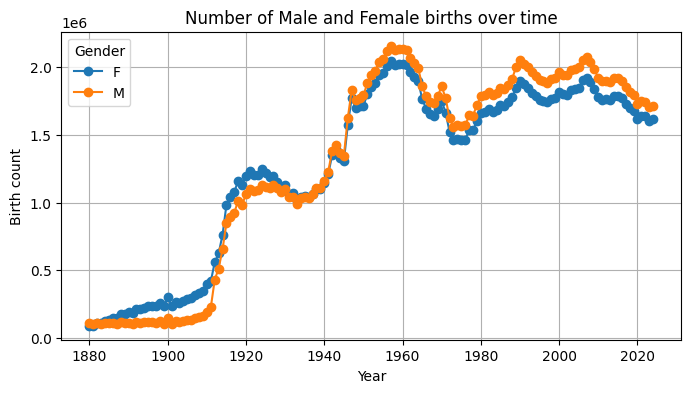

In [ ]:
#Group by gender and year
gender = all_data.groupby(["Year","Gender"])["Count"].sum().unstack()

#PLot
gender.plot(figsize=(8,4),marker='o')
plt.title("Number of Male and Female births over time",fontsize=12)
plt.xlabel("Year")
plt.ylabel("Birth count")
plt.grid(True)
plt.show()

In [ ]:
year = 2020    # Change this to any year
top_names = all_data[all_data["Year"] == year].sort_values(by="Count", ascending=False).head(10)
print(f"TOp 10 Baby Names in {year}:\n")
print(top_names)

TOp 10 Baby Names in 2020:

              Name Gender  Count  Year
2007888       Liam      M  19858  2020
2007889       Noah      M  18451  2020
1990371     Olivia      F  17682  2020
1990372       Emma      F  15714  2020
2007890     Oliver      M  14275  2020
2007891     Elijah      M  13224  2020
1990373        Ava      F  13197  2020
1990374  Charlotte      F  13097  2020
1990375     Sophia      F  13095  2020
1990376     Amelia      F  12799  2020


In [ ]:
# Group by Name and Gender accross all years
popular_names = all_data.groupby(["Name","Gender"])["Count"].sum().reset_index()

# Sort by total count
popular_names = popular_names.sort_values(by="Count",ascending=False)

# Display top 10
popular_names.head(10)

,Name,Gender,Count
46487,James,M,5238570
51498,John,M,5174470
90090,Robert,M,4845891
75597,Michael,M,4418526
111314,William,M,4189004
73091,Mary,F,4139160
25809,David,M,3669730
52323,Joseph,M,2662040
89454,Richard,M,2576005
19682,Charles,M,2428685


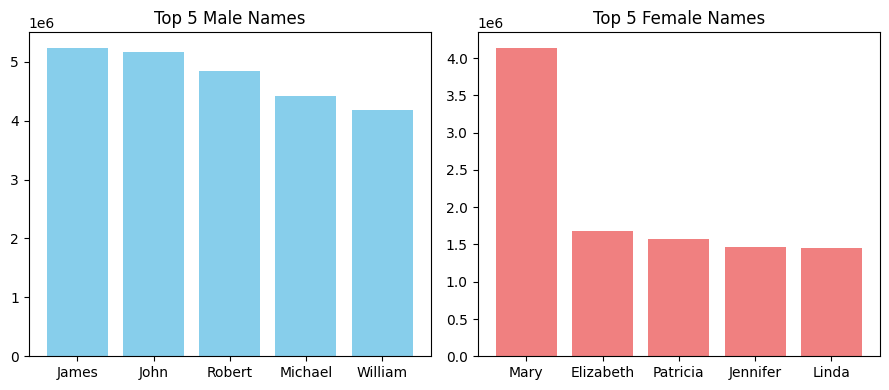

In [ ]:
top_male = popular_names[popular_names["Gender"] == "M"].head(5)
top_female = popular_names[popular_names["Gender"] == "F"].head(5)

plt.figure(figsize=(9,4))

plt.subplot(1, 2, 1)
plt.bar(top_male["Name"], top_male["Count"], color="skyblue")
plt.title("Top 5 Male Names")

plt.subplot(1, 2, 2)
plt.bar(top_female["Name"], top_female["Count"], color="lightcoral")
plt.title("Top 5 Female Names")

plt.tight_layout()
plt.show()

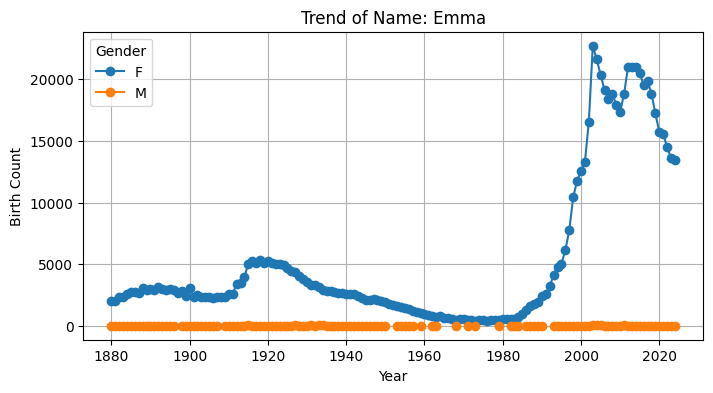

In [ ]:
def plot_name_trend(name):
    name_data = all_data[all_data["Name"].str.lower() == name.lower()]
    if name_data.empty:
        print(f"No data found for name: {name}")
        return
    pivot = name_data.pivot_table(index="Year", columns="Gender", values="Count", aggfunc="sum")
    pivot.plot(marker='o', figsize=(8,4))
    plt.title(f"Trend of Name: {name}" , fontsize=12)
    plt.xlabel("Year",fontsize=10)
    plt.ylabel("Birth Count")
    plt.grid(True)
    plt.show()

# Example usage:
plot_name_trend("Emma")

In [ ]:
all_data = pd.DataFrame()

for file in z.namelist():
  if file.startswith("yob") and file.endswith(".txt"):
    year = int(file[3:7])   # Extract year from filename
    df = pd.read_csv(BytesIO(z.read(file)), header = None , names=["Name", "Gender", "Count"])
    df["Year"] = year
    all_data = pd.concat([all_data, df], ignore_index = True )

all_data.head(15)

,Name,Gender,Count,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880
